In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use('tableau-colorblind10')

try:
    df = pd.read_csv('german_credit_data.csv', index_col=0)
    print("Archivo cargado correctamente.")
except FileNotFoundError:
    print("ERROR: No encuentro el archivo 'german_credit_data.csv'.")
    print("Asegúrate de haberlo subido a la carpeta de la izquierda.")

print("\n--- Nombres EXACTOS de tus columnas ---")
print(list(df.columns))

print("\n--- Primeras 3 filas de datos ---")
display(df.head(3))



Archivo cargado correctamente.

--- Nombres EXACTOS de tus columnas ---
['laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']

--- Primeras 3 filas de datos ---


,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
laufkont,,,,,,,,,,,,,,,,,,,,
1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1


In [20]:
new_names = {
    'Age': 'Age',
    'Sex': 'Sex',
    'Job': 'Job',
    'Housing': 'Housing',
    'Saving accounts': 'Savings_Account',
    'Checking account': 'Checking_Account',
    'Credit amount': 'Credit_Amount',
    'Duration': 'Duration',
    'Purpose': 'Purpose',
    'Risk': 'Risk'
}

df = df.rename(columns=new_names)

print("Nombres de columnas estandarizados.")
print(list(df.columns))


Nombres de columnas estandarizados.
['Duration_Months', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Duration', 'Installment_Rate', 'Personal_Status', 'Guarantors', 'Residence_Years', 'Property', 'Age', 'Other_Installment_Plans', 'Housing', 'Existing_Credits_Count', 'Job_Skill_Level', 'Dependents', 'Phone', 'Foreign_Worker', 'Risk']


In [19]:
print("Nulos antes de limpiar:")
print(df.isnull().sum())

df['Savings_Account'] = df['Savings_Account'].fillna('Unknown')
df['Checking_Account'] = df['Checking_Account'].fillna('Unknown')

print("\n Limpieza completada. Nulos actuales:")
print(df.isnull().sum())


Nulos antes de limpiar:
Duration_Months               0
Credit_History                0
Purpose                       0
Credit_Amount                 0
Savings_Account               0
Employment_Duration           0
Installment_Rate              0
Personal_Status               0
Guarantors                    0
Residence_Years               0
Property                      0
Age                           0
Other_Installment_Plans       0
Housing                       0
Existing_Credits_Count        0
Job_Skill_Level               0
Dependents                    0
Phone                         0
Foreign_Worker                0
Risk                       1000
dtype: int64


KeyError: 'Checking_Account'

In [6]:
conteo = df['Risk'].value_counts()
porcentajes = df['Risk'].value_counts(normalize=True) * 100

print("--- Distribución del Riesgo ---")
print(conteo)
print("\n--- Porcentajes ---")
print(porcentajes.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=df, palette='viridis')
plt.title('Distribución de Clientes: Good vs Bad Risk', fontsize=14)
plt.xlabel('Clasificación de Riesgo')
plt.ylabel('Cantidad de Clientes')
plt.show()


KeyError: 'Risk'

In [18]:
print("Tus columnas actuales son:")
lista_columnas = df.columns.tolist()
print(lista_columnas)

posible_objetivo = lista_columnas[-1]

print(f"\nSospechamos que la variable objetivo es: '{posible_objetivo}'")

if posible_objetivo != 'Risk':
    df = df.rename(columns={posible_objetivo: 'Risk'})
    print(f"Arreglado: Hemos renombrado '{posible_objetivo}' a 'Risk'.")
else:
    print("La columna ya se llama 'Risk'.")

print("\n--- Verificando la columna 'Risk' ---")
try:
    print(df['Risk'].value_counts())
    print("\n Listo. El error ha desaparecido.")
except KeyError:
    print("Todavía hay problemas. Copia y pega la lista de columnas que salió arriba para ayudarte.")


Tus columnas actuales son:
['Duration_Months', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Duration', 'Installment_Rate', 'Personal_Status', 'Guarantors', 'Residence_Years', 'Property', 'Age', 'Other_Installment_Plans', 'Housing', 'Existing_Credits_Count', 'Job_Skill_Level', 'Dependents', 'Phone', 'Foreign_Worker', 'Risk']

Sospechamos que la variable objetivo es: 'Risk'
La columna ya se llama 'Risk'.

--- Verificando la columna 'Risk' ---
Series([], Name: count, dtype: int64)

 Listo. El error ha desaparecido.


In [17]:
mapa_traduccion = {
    'laufzeit': 'Duration_Months',
    'moral': 'Credit_History',
    'verw': 'Purpose',
    'hoehe': 'Credit_Amount',
    'sparkont': 'Savings_Account',
    'beszeit': 'Employment_Duration',
    'rate': 'Installment_Rate',
    'famges': 'Personal_Status',
    'buerge': 'Guarantors',
    'wohnzeit': 'Residence_Years',
    'verm': 'Property',
    'alter': 'Age',
    'weitkred': 'Other_Installment_Plans',
    'wohn': 'Housing',
    'bishkred': 'Existing_Credits_Count',
    'beruf': 'Job_Skill_Level',
    'pers': 'Dependents',
    'telef': 'Phone',
    'gastarb': 'Foreign_Worker'
}

df = df.rename(columns=mapa_traduccion)

df['Risk'] = df['Risk'].map({1: 'Good Credit', 0: 'Bad Credit'})

print("Columnas traducidas y Riesgo etiquetado.")
print("\n--- Vista Previa Final ---")
display(df.head())


Columnas traducidas y Riesgo etiquetado.

--- Vista Previa Final ---


,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Duration,Installment_Rate,Personal_Status,Guarantors,Residence_Years,Property,Age,Other_Installment_Plans,Housing,Existing_Credits_Count,Job_Skill_Level,Dependents,Phone,Foreign_Worker,Risk
laufkont,,,,,,,,,,,,,,,,,,,,
1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,NaN
1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,NaN
2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,NaN
1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,NaN
1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,NaN


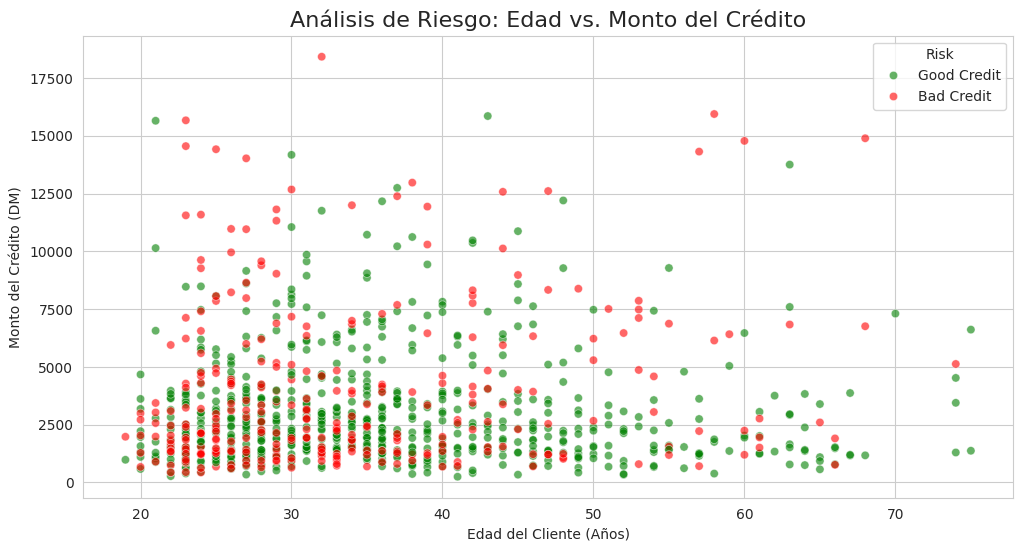

In [9]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Age',
                y='Credit_Amount',
                hue='Risk',
                data=df,
                palette={'Good Credit': 'green', 'Bad Credit': 'red'},
                alpha=0.6)

plt.title('Análisis de Riesgo: Edad vs. Monto del Crédito', fontsize=16)
plt.xlabel('Edad del Cliente (Años)')
plt.ylabel('Monto del Crédito (DM)')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_clean = df.dropna()
X = pd.get_dummies(df_clean.drop('Risk', axis=1), drop_first=True) # Variables
y = df_clean['Risk'].apply(lambda x: 1 if x == 'Good Credit' else 0) # Objetivo (1=Bueno, 0=Malo)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Modelo Entrenado")
print(f"Precisión del Modelo: {accuracy:.1%}")
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, predictions))


Modelo Entrenado
Precisión del Modelo: 70.5%

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.55      0.26      0.35        62
           1       0.73      0.91      0.81       138

    accuracy                           0.70       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.68      0.70      0.67       200



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_opt = LogisticRegression(max_iter=3000, random_state=42)
model_opt.fit(X_train_scaled, y_train)

predictions_opt = model_opt.predict(X_test_scaled)
accuracy_opt = accuracy_score(y_test, predictions_opt)

print(f"Modelo Optimizado y sin errores")
print(f"Nueva Precisión: {accuracy_opt:.1%}")
print("\n--- Reporte Final para el Banco ---")
print(classification_report(y_test, predictions_opt))


Modelo Optimizado y sin errores
Nueva Precisión: 72.0%

--- Reporte Final para el Banco ---
              precision    recall  f1-score   support

           0       0.61      0.27      0.38        62
           1       0.74      0.92      0.82       138

    accuracy                           0.72       200
   macro avg       0.67      0.60      0.60       200
weighted avg       0.70      0.72      0.68       200



MODELO AJUSTADO AL RIESGO (Balanced)
Precisión Global: 68.0%

--- Desglose por Tipo de Cliente ---
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        62
           1       0.84      0.67      0.74       138

    accuracy                           0.68       200
   macro avg       0.66      0.69      0.66       200
weighted avg       0.73      0.68      0.69       200



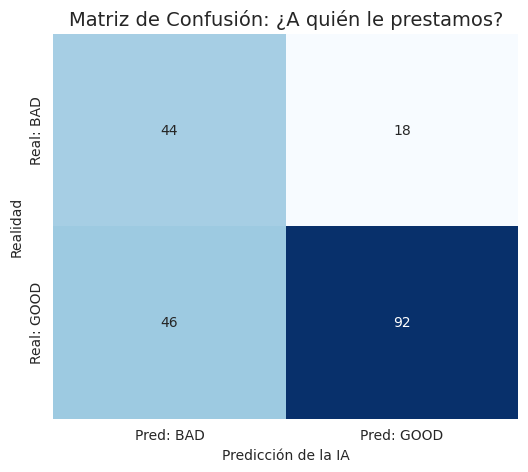

In [13]:
model_risk = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)

model_risk.fit(X_train_scaled, y_train)

predictions_risk = model_risk.predict(X_test_scaled)

print("MODELO AJUSTADO AL RIESGO (Balanced)")
print(f"Precisión Global: {accuracy_score(y_test, predictions_risk):.1%}")
print("\n--- Desglose por Tipo de Cliente ---")
print(classification_report(y_test, predictions_risk))

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, predictions_risk)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: BAD', 'Pred: GOOD'],
            yticklabels=['Real: BAD', 'Real: GOOD'])
plt.title('Matriz de Confusión: ¿A quién le prestamos?', fontsize=14)
plt.ylabel('Realidad')
plt.xlabel('Predicción de la IA')
plt.show()
